In [3]:
pip install python-utils


Note: you may need to restart the kernel to use updated packages.


In [1]:
import python_utils

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from python_utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\\gsury\\OneDrive\\Desktop\\jaya\\Datasets\\house_data.csv") 
df.head()


,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [6]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [7]:
df.shape

(5000, 7)

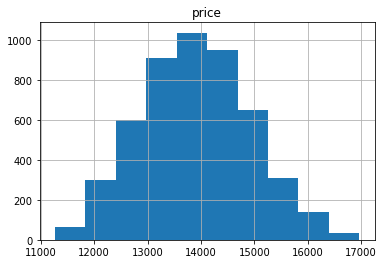

In [8]:
df.hist("price")
plt.show()


# Check Missing Values

In [9]:
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [11]:
#Data Normalization
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [12]:
#Selecting X Labels
X = df_norm.iloc[:, :5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [13]:
#Selecting Y Labels
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [14]:
X_arr = X.values
Y_arr = Y.values

In [15]:
X_arr

array([[ 0.18138426,  1.25700164,  0.34522379, -0.30721158, -1.26079862],
       [-1.31911814, -0.93060999, -0.60931203,  0.32530146, -1.26079862],
       [-0.08341028, -0.61809404,  0.66340239,  1.59032754, -1.57645598],
       ...,
       [-1.14258845,  1.56951759,  0.02704518,  1.59032754,  0.00183081],
       [ 1.59362182, -0.61809404,  0.02704518, -1.25598114,  0.94880289],
       [-0.87779391, -1.24312594,  1.2997596 ,  1.59032754,  0.63314553]])

In [16]:
Y_arr

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

In [17]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state=1)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4950, 5)
y_train shape:  (4950,)
X_test shape:  (50, 5)
y_test shape:  (50,)


In [18]:
#Creating the Model

def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

In [19]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Model Training
model = get_model()

# this prediction is before training the model
preds_on_untrained = model.predict(X_test)

2/2 [==============================] - 1s 6ms/step


In [21]:
# Training the model and storing in the object history
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000
)

Epoch 1/1000
155/155 [==============================] - 2s 6ms/step - loss: 1.2947 - val_loss: 0.9107
Epoch 2/1000
155/155 [==============================] - 1s 4ms/step - loss: 1.2919 - val_loss: 0.9085
Epoch 3/1000
155/155 [==============================] - 1s 3ms/step - loss: 1.2891 - val_loss: 0.9063
Epoch 4/1000
155/155 [==============================] - 1s 4ms/step - loss: 1.2865 - val_loss: 0.9042
Epoch 5/1000
155/155 [==============================] - 1s 4ms/step - loss: 1.2839 - val_loss: 0.9020
Epoch 6/1000
155/155 [==============================] - 1s 3ms/step - loss: 1.2813 - val_loss: 0.8999
Epoch 7/1000
155/155 [==============================] - 1s 3ms/step - loss: 1.2787 - val_loss: 0.8979
Epoch 8/1000
155/155 [==============================] - 1s 4ms/step - loss: 1.2761 - val_loss: 0.8959
Epoch 9/1000
155/155 [==============================] - 1s 4ms/step - loss: 1.2735 - val_loss: 0.8940
Epoch 10/1000
155/155 [==============================] - 1s 4ms/step - loss: 1.271

In [23]:
# make predictions on the trained model
preds_on_trained = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [28]:
print(preds_on_trained)

[[-0.21412452]
 [-0.09897868]
 [-0.08067395]
 [ 0.3759753 ]
 [ 0.56348187]
 [ 0.5530294 ]
 [-0.2032259 ]
 [-0.26277614]
 [-0.09513661]
 [ 0.18157203]
 [ 0.2911849 ]
 [-0.09897868]
 [ 0.27574033]
 [-0.09665033]
 [ 0.15556411]
 [ 0.8321437 ]
 [-0.09897868]
 [ 0.44632536]
 [-0.09897868]
 [-0.08845058]
 [-0.09897868]
 [ 0.18044041]
 [ 0.06334558]
 [ 0.23159243]
 [ 0.5704005 ]
 [ 0.74849814]
 [ 0.8086973 ]
 [-0.25078118]
 [ 0.33517593]
 [-1.0160458 ]
 [ 0.23536266]
 [-0.08038257]
 [ 0.5306284 ]
 [ 0.19093879]
 [ 0.4984669 ]
 [ 0.11411346]
 [ 0.33351064]
 [ 0.01967082]
 [ 1.3554293 ]
 [ 0.05683012]
 [-0.09897868]
 [-0.06342298]
 [-0.09897868]
 [ 0.32055688]
 [ 0.7872495 ]
 [-0.09897868]
 [-0.09897868]
 [-0.50799155]
 [ 0.8470142 ]
 [ 0.9930673 ]]


In [31]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, preds_on_trained)

In [32]:
print(mse)

0.4179051376084805
